# 단순 선형 회귀

# < 사이킷런에서 최소제곱법으로 단순 선형회귀 수행 >

![image.png](./images/image2.png)

### 필요한 모듈 import

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. 맥주 데이터를 활용한 단순 선형 회귀 실습

### 데이터 수집

In [ ]:
import os
os.getcwd()

'/Users/bongjupark/Library/CloudStorage/OneDrive-개인/2022_데이터청년캠퍼스/실습파일'

In [ ]:
beer = pd.read_csv('./data/beer.csv')
beer

,beer,temperature
0,45.3,20.5
1,59.3,25.0
2,40.4,10.0
3,38.0,26.9
4,37.0,15.8
5,40.9,4.2
6,60.2,13.5
7,63.3,26.0
8,51.1,23.3
9,44.9,8.5


### 데이터 탐색

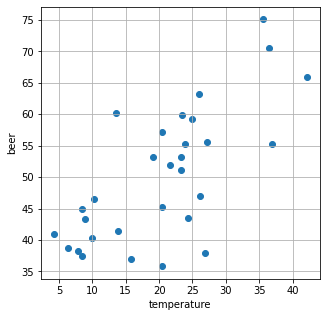

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(beer['temperature'], beer['beer'])
plt.xlabel('temperature')
plt.ylabel('beer')
plt.grid()
plt.show()

In [ ]:
# 독립 변수, 종속 변수 확인
beer['temperature']

0     20.5
1     25.0
2     10.0
3     26.9
4     15.8
5      4.2
6     13.5
7     26.0
8     23.3
9      8.5
10    26.2
11    19.1
12    24.3
13    23.3
14     8.4
15    23.5
16    13.9
17    35.5
18    27.2
19    20.5
20    10.2
21    20.5
22    21.6
23     7.9
24    42.2
25    23.9
26    36.9
27     8.9
28    36.4
29     6.4
Name: temperature, dtype: float64

In [ ]:
# 종속 변수 확인, 레코드 수 확인

In [ ]:
beer['beer']

0     45.3
1     59.3
2     40.4
3     38.0
4     37.0
5     40.9
6     60.2
7     63.3
8     51.1
9     44.9
10    47.0
11    53.2
12    43.5
13    53.2
14    37.4
15    59.9
16    41.5
17    75.1
18    55.6
19    57.2
20    46.5
21    35.8
22    51.9
23    38.2
24    66.0
25    55.3
26    55.3
27    43.3
28    70.5
29    38.8
Name: beer, dtype: float64

###  데이터 준비 - 학습용 / 검증용 데이터 분리

In [ ]:

#독립변수, 종속변수 데이터셋 준비
# 1차원인 독립변수를  sklearn 의 요구사항에 따라 2차원으로 만들기

import numpy as np

X = np.array(beer.temperature).reshape(-1, 1)
y = beer.beer

# 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
y_test

17    75.1
21    35.8
10    47.0
19    57.2
14    37.4
20    46.5
Name: beer, dtype: float64

### 모델 구축

In [ ]:

#모델 클래스 선택 후 인스턴스 객체 생성
from sklearn.linear_model import LinearRegression

lr = LinearRegression()


In [ ]:
# 학습 수행
reg = lr.fit(X_train, y_train)

In [ ]:
# 계수 및 절편 확인: _속성은 학습을 통해 결정되는 속성
reg.coef_, reg.intercept_

(array([0.69705648]), 36.06666541566105)

In [ ]:
#회귀식
print('y= {:.2f}X + {:.3f}'.format(reg.coef_[0], reg.intercept_))

y= 0.70X + 36.067


In [ ]:
beer

,beer,temperature
0,45.3,20.5
1,59.3,25.0
2,40.4,10.0
3,38.0,26.9
4,37.0,15.8
5,40.9,4.2
6,60.2,13.5
7,63.3,26.0
8,51.1,23.3
9,44.9,8.5


In [ ]:
X_test

array([[35.5],
       [20.5],
       [26.2],
       [20.5],
       [ 8.4],
       [10.2]])

In [ ]:
y_test

17    75.1
21    35.8
10    47.0
19    57.2
14    37.4
20    46.5
Name: beer, dtype: float64

In [ ]:
# 구축된 모델에서 예측 수행
y_pred = reg.predict(X_test)
y_pred

array([60.81217046, 50.35632326, 54.32954519, 50.35632326, 41.92193985,
       43.17664151])

### 모델 성능 평가

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
#MSE

mse = mean_squared_error(y_test, y_pred)
#RMSE
rmse = np.sqrt(mse)

print('mse: ', np.round(mse, 3))
print('rmse: ', np.round(rmse, 3))

mse:  91.347
rmse:  9.558


In [ ]:
#결정계수 R2
r2 = r2_score(y_test, y_pred)
print("r2: ", np.round(r2, 3))

r2:  0.485


In [ ]:
xx = np.arange(beer.temperature.min() - 1, beer.temperature.max() + 1)
yy = reg.predict(xx.reshape(-1, 1))
list(zip(xx, yy))

[(3.2, 38.29724615171426),
 (4.2, 38.99430263173089),
 (5.2, 39.691359111747516),
 (6.2, 40.38841559176415),
 (7.2, 41.08547207178078),
 (8.2, 41.782528551797405),
 (9.2, 42.47958503181403),
 (10.2, 43.17664151183067),
 (11.2, 43.873697991847294),
 (12.2, 44.57075447186392),
 (13.2, 45.26781095188055),
 (14.2, 45.96486743189718),
 (15.2, 46.66192391191381),
 (16.2, 47.35898039193044),
 (17.2, 48.05603687194707),
 (18.2, 48.7530933519637),
 (19.2, 49.450149831980326),
 (20.2, 50.14720631199695),
 (21.2, 50.84426279201358),
 (22.2, 51.541319272030215),
 (23.2, 52.23837575204684),
 (24.2, 52.93543223206347),
 (25.2, 53.632488712080104),
 (26.2, 54.32954519209673),
 (27.2, 55.02660167211336),
 (28.2, 55.723658152129985),
 (29.2, 56.42071463214661),
 (30.2, 57.11777111216324),
 (31.2, 57.814827592179874),
 (32.2, 58.51188407219651),
 (33.2, 59.208940552213136),
 (34.2, 59.90599703222976),
 (35.2, 60.60305351224639),
 (36.2, 61.30010999226302),
 (37.2, 61.99716647227965),
 (38.2, 62.69422295

### 시각화

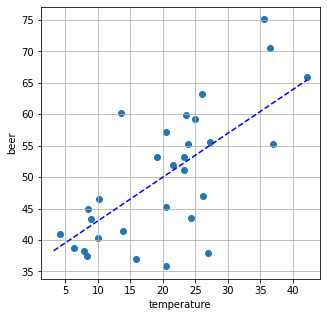

In [ ]:



# 수집한 데이터셋 시각화

plt.figure(figsize=(5,5))
plt.scatter(beer['temperature'], beer['beer'])
plt.xlabel('temperature')
plt.ylabel('beer')
plt.grid()

#y = 0.697056X + 36.356 시각화
xx = np.arange(beer.temperature.min() -1, beer.temperature.max() + 1)
yy = reg.predict(xx.reshape(-1, 1))
plt.plot(xx, yy, linestyle='--', color='blue')
plt.show()

# 응용1. 나이, 키의 관계를 회귀 분석

In [ ]:
# 필요한 모듈 import 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### 데이터 생성/수집

In [ ]:
data_df = pd.read_csv("./data/age_height.csv")
data_df

,age(X),height(T)
0,15.425550,170.910131
1,23.008112,160.675599
2,5.002859,129.002066
3,12.558314,159.701396
4,8.668897,155.460589
5,7.308465,140.561344
6,9.656505,153.654664
7,13.639018,159.429396
8,14.919187,164.704239
9,18.470418,169.645276


#### 데이터 탐색

In [ ]:
# 데이터 분포 시각화

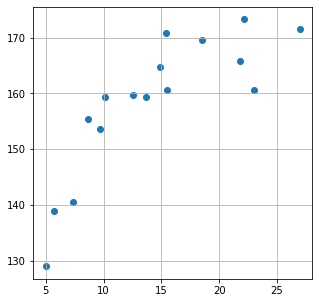

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(data_df['age(X)'], data_df['height(T)'])
plt.grid()

#### 데이터 준비 - 학습용 / 검증용 데이터 분리

In [ ]:
X = np.array(data_df['age(X)']).reshape(-1, 1)
y = data_df['height(T)']
# 전체 데이터 중 80%는 학습용, 20%는 검증용으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
#####모델 구축 및 예측
from sklearn.linear_model import LinearRegression



In [ ]:
#모델 객체 생성  및 학습
lr = LinearRegression()

reg = lr.fit(X_train, y_train)
# 예측 수행
y_pred = reg.predict(X_test)




In [ ]:
#####모델 성능 평가

#MSE : metrcics 모듈의 mean_squared_error() 함수 사용
#RMSE : numpy의 sqrt() 함수 사용



# MSE
mse = mean_squared_error(y_test, y_pred)

#RMSE
rmse = np.sqrt(mse)

#결정계수 R2
r2 = r2_score(y_test, y_pred)

print("MSE: ", np.round(mse, 3))
print("RMSE: ", np.round(rmse, 3))
print("coef: ", reg.coef_[0])
print("intercept: ", reg.intercept_)
print("R2: ", np.round(r2, 3))
#회귀식
print('y = {:.2f}X + {:.3f}'.format(reg.coef_[0], reg.intercept_))


MSE:  83.495
RMSE:  9.138
coef:  1.4386347808651563
intercept:  138.78419382830361
R2:  0.663
y = 1.44X + 138.784


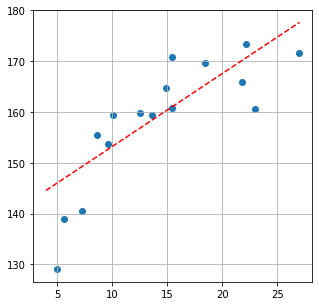

In [ ]:
#나이, 키 데이터 실제 데이터 및 회귀식 시각화

plt.figure(figsize=(5,5))
plt.scatter(data_df['age(X)'], data_df['height(T)'])
plt.grid()
#y = 0.697056X + 36.06 시각화
xx = np.arange(data_df['age(X)'].min() -1, data_df['age(X)'].max() + 1)
yy = reg.predict(xx.reshape(-1, 1))
plt.plot(xx, yy,linestyle='--', color='red')
plt.show()


# < 스탯츠모델에서 단순선형회귀 수행>

In [ ]:
#!pip install statsmodels

In [ ]:
import statsmodels

In [ ]:
#스탯츠모델 import
import statsmodels.api as sm

# 맥주 데이터 
# 데이터 생성
beer = pd.read_csv('./data/beer.csv')

#독립변수, 종속변수 데이터셋 준비
X = np.array(beer.temperature).reshape(-1,1)
y = beer.beer

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [ ]:
# 스탯츠모델

lr = sm.OLS(y_train, X_train)

reg = lr.fit()

In [ ]:
# 성능 평가
y_pred = reg.predict(X_test)

In [ ]:
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                   beer   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     22.63
Date:                Fri, 01 Jul 2022   Prob (F-statistic):           9.50e-05
Time:                        09:35:07   Log-Likelihood:                -79.854
No. Observations:                  24   AIC:                             163.7
Df Residuals:                      22   BIC:                             166.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.0667      3.315     10.881      0.0

# 응용2: 농어 무게 예측

In [ ]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
X = np.array(perch_length).reshape(-1, 1)
y = perch_weight

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

reg = lr.fit(X_train, y_train)

In [ ]:
reg.coef_

array([35.63110638])

In [ ]:
reg.intercept_

-618.3317511711567

In [ ]:
# 회귀식
print('y = {:.3f}X + {:.3f}'.format(reg.coef_[0], reg.intercept_))

y = 35.631X + -618.332


In [ ]:
# 예측값 구하기

y_pred = reg.predict(X_test)

# MSE, RMSE, R2
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

print("MSE: ", mse)
print("RMSE: ", rmse)
print("r2_score: ",r2 )


MSE:  14550.237015602397
RMSE:  120.6243632754279
r2_score:  0.880333023666755


In [ ]:
# 길이가 50cm 일때 농어의 무게는 얼마일까요?

In [ ]:
reg.predict([[50]])

array([1163.22356782])

# 응용3: 보스턴 집값 선형 회귀

### 데이터 수집

In [ ]:
from sklearn.datasets import load_boston

boston = load_boston()

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include t

### 데이터 탐색

In [ ]:
dir(boston)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

In [ ]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
print(boston.data[:5])

[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]
 [3.2370e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 6.9980e+00
  4.5800e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9463e+02
  2.9400e+00]
 [6.9050e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 7.1470e+00
  5.4200e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9690e+02
  5.3300e+00]]


In [ ]:
print(boston.target[:5])

[24.  21.6 34.7 33.4 36.2]


In [ ]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


### 데이터 준비

In [ ]:
# boston 데이터에서 독립변수(RM), 종속 변수를 각각 골라내고 데이터프레임으로 변환

In [ ]:
#데이터 탐색


### 학습용/ 검증용 데이터 분리

In [ ]:
# 조건 : 학습 7, 검증 3
# seed  = 1로 고정
##### 5분 실습 / 결정 계수를 구하라


### 모델 구축

### 모델 평가

### 시각화